# **Predicting bank churn rate**
# **By Syafiq Akmal**

# **Setup of Packages and Reading Dataset**

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Please refer to
# https://scikit-learn.org/stable/
# for more information

from scipy.stats import pearsonr
# Please refer to
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
# for more information

# Disable warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Input the data BankCustomerChurnPrediction.csv by pd.read_csv as 'data'
# Input the column names col_list.csv by pd.read_csv as 'col_list'

data = pd.read_csv('/content/drive/My Drive/IS4303/Datasets/BankCustomerChurnPrediction.csv')

# **1.0 Exploratory Data Analysis**

This step features understanding the data type, stats and visualisations of variables, correlation analysis and outlier detections.

# **Understanding The Dataset**

In [ ]:
# Assessing the structure and integrity of the bank churn dataset, including identifying missing values and understanding the data types of each column.
data.info()
data.describe()
#one hot encoding for the gender cat variable
#country, gender nominal
#age numerical
#product_num shld be nominal/ordinal
#careful with ordinal data

#for gender, create 0 and 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.head()
# num_rows = data.shape[0]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**There is a total of 11 variables (10 independent and 1 target which is churn). 6 numerical and 5 categorical variables are present in the dataset.**

1) credit_score (350 - 850): numerical interval

2) country, , there are 3 countries, France, Germany and Spain.
: categorical nominal

3) gender: categorical nominal

4) age: numerical ratio

5) tenure: numerical interval

6) balance: numerical ratio

7) product_numbers (1 - 4), refers to number of products user have from the bank : numerical interval

8) credit_card (0 or 1) , 0 represents no , 1 represents own credit card : categorical nominal

9)  estimated salary (0 or 1) , : numerical ratio

10)  active_member (0 or 1) , 0 represents no , 1 represents active, note this is not churn, instead definition of active is whether users login multiple times, called for services etc : categorical nominal

11) churn (target value), 1 represent churn: categorical nominal

In [ ]:
# Checking for missing values (null values) in each column of our DataFrame and printing the count of missing values for each column.
print(data.isnull().sum())

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


There are no missing values present in the dataset.

<!-- **[Distribution Of Target Value](https://)** -->
# **Distribution Of Churn (Target Value)**

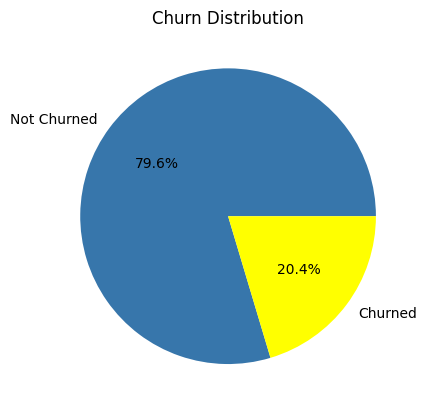

Number of 0s (Not churned): 7963
Number of 1s (Churned): 2037


In [ ]:
#churn is the target
churn_counts = data['churn'].value_counts()

plt.pie(churn_counts, labels=['Not Churned', 'Churned'], colors=['#3776ab', 'yellow'], autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

# Print the number of occurrences of 0 in the 'churn' column, return 0 if 0 is not present
print("Number of 0s (Not churned):", churn_counts.get(0, 0))
# Print the number of occurrences of 1 in the 'churn' column, return 0 if 1 is not present
print("Number of 1s (Churned):", churn_counts.get(1, 0))



The target variable of our dataset is roughly balanced, where there is 20.4% positive, 79.6% negative hence there is no need to do oversampling for this dataset.

# **Distribution of the 10 Independent Variables**



# **Distribution for the 6 numerical variables**

1) credit_score (350 - 850): numerical interval

2) age: numerical ratio

3) tenure: numerical interval

4) balance: numerical ratio

5) product_numbers (1 - 4), refers to number of products user have from the bank : numerical interval

6) estimated salary (0 or 1) , : numerical ratio

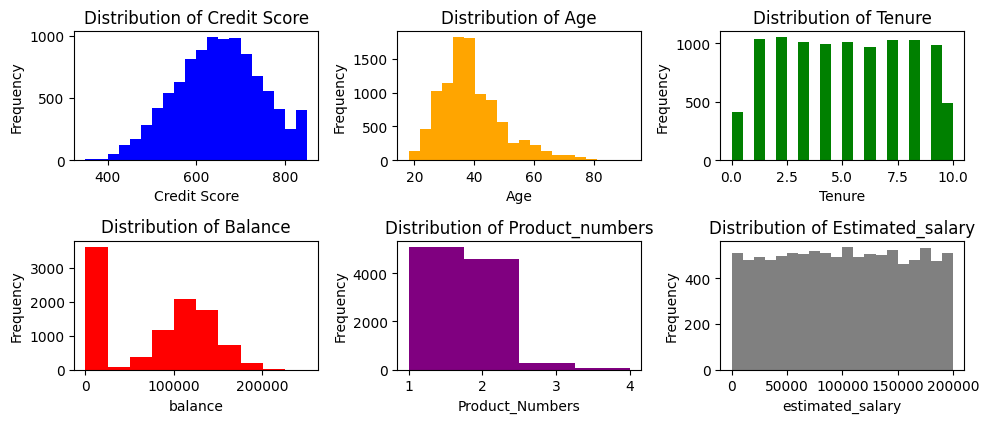

In [ ]:
# 1) credit_score (350 - 850): numerical interval
# 2) age: numerical ratio
# 3) tenure: numerical interval
# 4) balance: numerical ratio
# 5) product_numbers (1 - 4), refers to number of products user have from the bank : numerical ordinal
# 6) estimated salary (0 or 1) , : numerical ratio


plt.figure(figsize=(10, 6))

# 1) Distribution of 'credit score', numerical interval
plt.subplot(3, 3, 1) # 3 by 3 grid
plt.hist(data['credit_score'], bins=20, color='blue')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Score')


# 2) Distribution of 'age',  numerical ratio
plt.subplot(3, 3, 2)
plt.hist(data['age'], bins=20, color='orange')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# 3) Distribution of 'tenure',  numerical interval
plt.subplot(3, 3, 3)
plt.hist(data['tenure'], bins=20, color='green')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')

# 4) Distribution of 'balance of user',  numerical interval
plt.subplot(3, 3, 4)
plt.hist(data['balance'], bins=10, color='red')
plt.xlabel('balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance')


# 5) Distribution of 'product_numbers', basically how many products a member have with the bank,  numerical interval
plt.subplot(3, 3, 5)
plt.hist(data['products_number'], bins=4, color='purple')
plt.xlabel('Product_Numbers')
plt.ylabel('Frequency')
plt.title('Distribution of Product_numbers')

# 6) Distribution of 'estimated salary', numerical ratio
plt.subplot(3, 3, 6)
plt.hist(data['estimated_salary'], bins=20, color='grey')
plt.xlabel('estimated_salary')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated_salary')

#sharpening the design
plt.tight_layout()
plt.show()

Reason for histogram use:

Histograms provide a visual summary of a variable's distribution, revealing insights into its central tendency, spread, and shape. They aid in identifying skewness, detecting outliers, and understanding the dataset's variability.

Observations the histograms:

1. The distribution of Credit Score has a mean of approximately 620 with a wide spread from 0 to 850 and it follows a normal distribution quite closely. The wide spread of credit scores from 0 to 850 suggests diversity in individuals' credit ratings, with scores covering the entire possible range. The observation that the majority of people tend to have credit scores on the higher side of 620 implies that a significant proportion of individuals have credit scores above the mean, indicating a relatively favorable credit profile for many in the population.

2. The distribution of age has a mean of approximately 37. The positively skewed distribution of age data indicates that while the mean age is approximately 37, there is an asymmetrical spread towards younger ages. The inference drawn from the positively skewed distribution implies that the bulk of the bank's customers fall within the late 20s to early 40s age range.

3. The distribution for the tenure of the customers show that customer tenure at the bank appears to follow a uniform pattern, with approximately equal frequencies of customers across the 0 to 10-year range. The uniform distribution suggests a relatively stable influx of customers over time, without any significant spikes or drops in tenure within the observed range.

4. The distribution of account balances appears to be bimodal, with one mode in the lower range (0 to 25,000) and another mode in the higher range (50,000 to 250,000). There shows a significant concentration of account balances in the lower range, indicating a large number of customers with relatively low balances. The normal distribution in the higher range suggests that there is also a notable portion of customers with higher balances, possibly indicating wealthier individuals or businesses.

5.  The distribution of product numbers is positively skewed, with the majority of customers having 1 or 2 products, indicating a higher tendency of customers to stick to fewer financial products with the bank compared to 3 or 4 products. The sharp drop in frequencies for 3 and 4 products suggests that fewer customers opt for higher numbers of products, possibly due to factors such as cost, complexity, or specific needs.

6. The distribution of estimated salaries appears to follow a uniform pattern, with approximately equal frequencies of salaries across the 11,600 to 200,000 range. The uniform distribution suggests that customers' estimated salaries are evenly spread out within the observed range, without any significant clustering or peaks. Thus, there is diverse range of income levels among customers, spanning from lower to higher income brackets.

# **Outlier Detection for the 6 Numerical Variables**

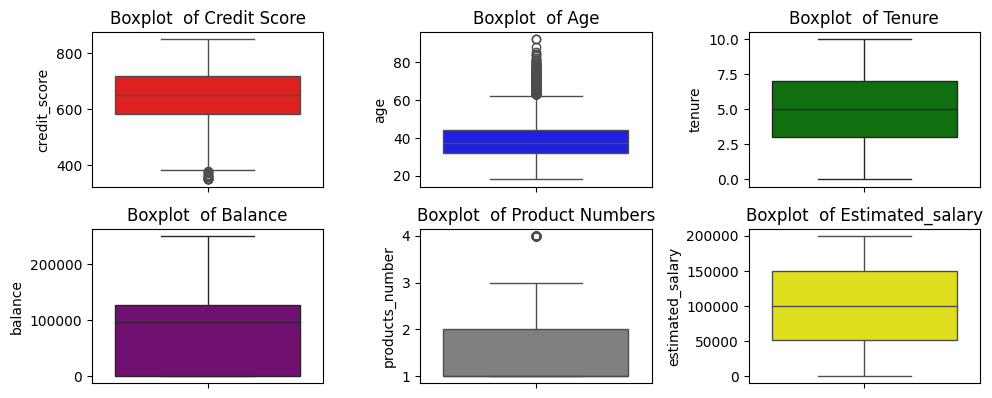

In [ ]:
# Outliers detection for 6 variab;es
plt.figure(figsize=(10, 6))

# 1) Boxplot of 'credit score', numerical interval
plt.subplot(3, 3, 1) # 3 by 3 grid
sns.boxplot(data=data['credit_score'], color='red')
plt.title('Boxplot  of Credit Score')

# 2) Boxplot of 'age',  numerical ratio
plt.subplot(3, 3, 2) # 3 by 3 grid
sns.boxplot(data=data['age'], color='blue')
plt.title('Boxplot  of Age')

# 3) Boxplot of 'tenure',  numerical interval
plt.subplot(3, 3, 3)
sns.boxplot(data=data['tenure'], color='green')
plt.title('Boxplot  of Tenure')

# 4) Boxplot of 'balance of user',  numerical interval
plt.subplot(3, 3, 4)
sns.boxplot(data=data['balance'], color='purple')
plt.title('Boxplot  of Balance')

# 5) Boxplot of 'Product Numbers',  numerical interval
plt.subplot(3, 3, 5)
sns.boxplot(data=data['products_number'], color='grey')
plt.title('Boxplot  of Product Numbers')

# 6) Boxplot of 'Estimated Salary',  numerical interval
plt.subplot(3, 3, 6)
sns.boxplot(data=data['estimated_salary'], color='yellow')
plt.title('Boxplot  of Estimated_salary')

#sharpening the design
plt.tight_layout()
plt.show()


The use of boxplot in this case is to identify outliers as points that fall outside of the whiskers, typically 1.5 * interquartile range from the box, are marked, allowing for easy identification of data points that deviate significantly from the rest.

There are 3 variables with outliers.

1) Credit Score: The boxplot shows data points that lie below the lower whisker of the boxplot, indicating that credit scores below 400 is a rarity when it comes to the demographics of our bank.

2) Age: The boxplot shows data points that lie above the upper whisker of the boxplot, indicating senior citizen above 60 are an outlier when it comes to the bank demographics.

3) Product Numbers: There is an outliers with data points that lie above the upper whisker of the box plot, indicating that product number of 4 for the bank is considered high as compared to the majority of the dataset.



**Reason for not removing:**

Outliers in credit scores may reflect genuine variations in credit ratings among individuals. Removing these outliers could distort the representation of the true credit landscape and lead to inaccurate results and assessments.

Age outliers above 60 may represent a segment of the population that is genuinely older and still active in financial activities. Removing these outliers could lead to a biased representation of the customer base, neglecting the financial needs and behaviors of older individuals.

Outliers with 4 products may represent a segment of the customer base with diverse financial needs and preferences. Removing these outliers could overlook customers with a higher number of financial needs. These natural outliers could represent individuals or businesses with complex financial portfolios, diverse banking requirements, or substantial wealth management needs.

# **Distribution Of the 4 Categorical Independent Variables**
**Country**: There are 3 countries, France, Germany and Spain.
 - categorical nominal

**Gender**: Male, Female
- categorical nominal

**Credit_card** (0 or 1) , 0 represents no , 1 represents own credit card
- categorical nominal


**Active_member** (0 or 1) , 0 represents no , 1 represents active, note this is not churn, instead definition of active is whether users login multiple times, called for services etc
 - categorical nominal


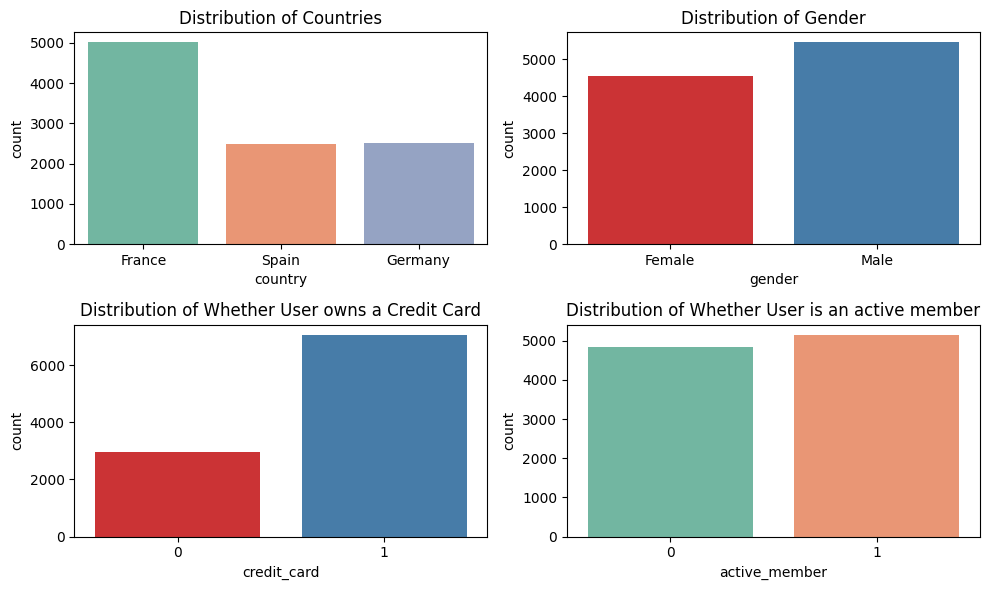

In [ ]:
# Outliers detection for 4 variab;es
plt.figure(figsize=(10, 6))

# 1) Countries
plt.subplot(2, 2, 1) # 3 by 3 grid
sns.countplot(data=data, x='country', palette='Set2')
plt.title('Distribution of Countries')

# 2) Gender
plt.subplot(2, 2, 2) # 3 by 3 grid
sns.countplot(data=data, x='gender', palette='Set1')
plt.title('Distribution of Gender')


# 3) Own Credit Card
plt.subplot(2, 2, 3) # 3 by 3 grid
sns.countplot(data=data, x='credit_card', palette='Set1')
plt.title('Distribution of Whether User owns a Credit Card')

# 4) Is Active_Member
plt.subplot(2, 2, 4) # 3 by 3 grid
sns.countplot(data=data, x='active_member', palette='Set2')
plt.title('Distribution of Whether User is an active member')

#sharpening the design
plt.tight_layout()
plt.show()

# **Distrbution of each feature**

**Country** :
It can be noted that there are 3 countries users come from, with majority being from France.

**Gender** :
There are slightly more males as compared to females.

**Credit Card** :
There are significantly more users who own credit cards compared to those that don't.

**Active members** :
As for being an active member, the numbers are about the same for both side but with more users being active then inactive.

## **Correlation Analysis**

**Correlation of Independent Variables to Target Value**

Note : Country and gender have not been splitted to numbers representation,hence will not show up in this plot. We will have a separate study on this. In this case, we have not included country and gender in the correlation plot as country and gender are non binary categorical data and thus including them does not yield menaningful correlation values.





In [ ]:
# # Convert 'gender' column to binary (0 and 1)
# data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

# # Convert 'country' column to numeric (0, 1, and 2)
# country_mapping = {'France': 0, 'Germany': 1, 'Spain': 2}
# data['country'] = data['country'].map(country_mapping)

<Axes: >

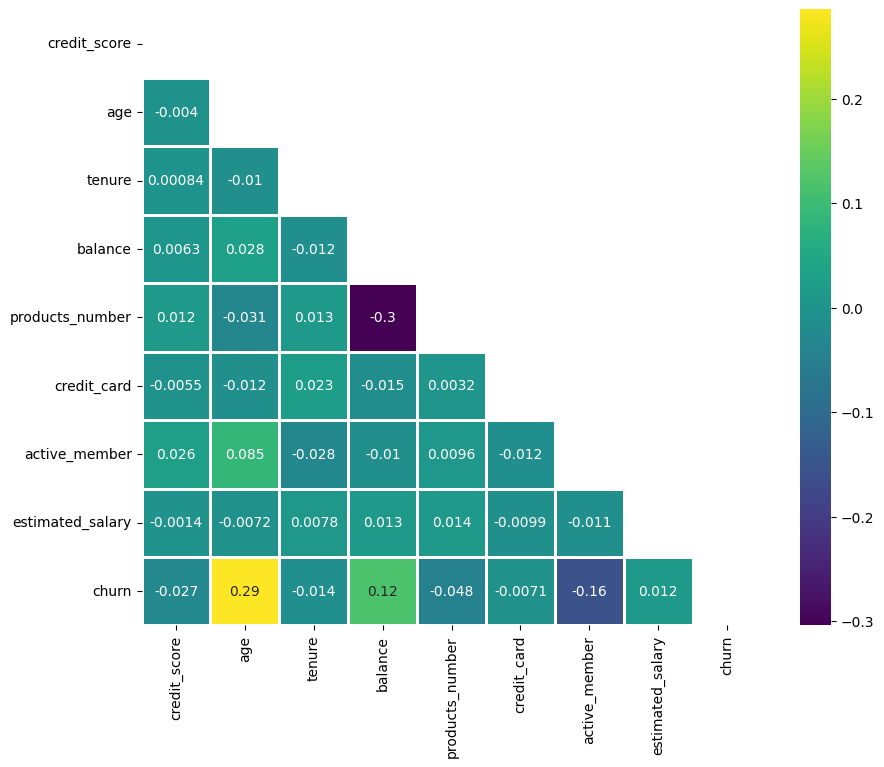

In [ ]:
plt.figure(figsize=(10, 8))

#var = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary', 'churn']
var = [col for col in data.columns if col not in ['customer_id', 'gender', 'country']]

correlation_matrix = data[var].corr().astype(float)

# Getting the Upper Triangle of the co-relation matrix to remove redundant information
upper_triangular_matrix = np.triu(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='viridis',mask = upper_triangular_matrix, linewidths=0.9)

# **Takeaway from correlation plot**

The analysis of the dataset indicates a weak positive correlation between balance and churn, with a correlation coefficient of 0.12. This suggests that as the balance increases, there may be a slight tendency for churn to increase as well, but the relationship is not strong enough to make definitive predictions.

Similarly, age and churn show a weak positive correlation, with a score of 0.29. This implies that older customers may have a marginally higher likelihood of churn compared to younger ones. However, the correlation is still relatively weak, and additional factors are likely influencing the churn rate beyond age alone.

For the rest of the variables, it seems that there is no linear relationship between churn and each of them.

# **Correlation of Country and Gender to Target Value**


In [ ]:
# import packages

from scipy.stats import chi2_contingency, chi2
import scipy.stats as stats

In [ ]:
# # Extract the relevant nominal data columns
# categorical_data = data[['gender', 'country']]

# # Create a contingency table
# contingency_table = pd.crosstab(categorical_data['gender'], categorical_data['country'])
# print(contingency_table)
# print()

# # Perform the Chi-squared test
# result = chi2_contingency(contingency_table)
# print(result)
# print()

# # Extracting the results
# chi2_statistic = result[0]
# p_value = result[1]
# print("Chi-square statistic:", chi2_statistic)
# print("P-value:", p_value)

# alpha = 0.05  # significance level
# if p_value <= alpha:
#     print("Reject null hypothesis: There is a correlation between gender and country.")
# else:
#     print("Fail to reject null hypothesis: There is no correlation between gender and country.")
categorical_data = data[['gender', 'country', 'churn']]


# Perform Chi-square test for Country
chi2_country, p_country, _, _ = stats.chi2_contingency(pd.crosstab(categorical_data['country'], categorical_data['churn']))
print("Chi-square test for Country - p-value:", p_country)

# Perform Chi-square test for Gender
chi2_gender, p_gender, _, _ = stats.chi2_contingency(pd.crosstab(categorical_data['gender'], categorical_data['churn']))
print("Chi-square test for Gender - p-value:", p_gender)


Chi-square test for Country - p-value: 3.8303176053541544e-66
Chi-square test for Gender - p-value: 2.2482100097131755e-26


#**Exploring Categorical Variables and Churn Patterns**

We are exploring the breakdown of the categorical variables based on whether churn is 1 or 0.

Note: For country variable, France : 0, Germany : 1, Spain : 2

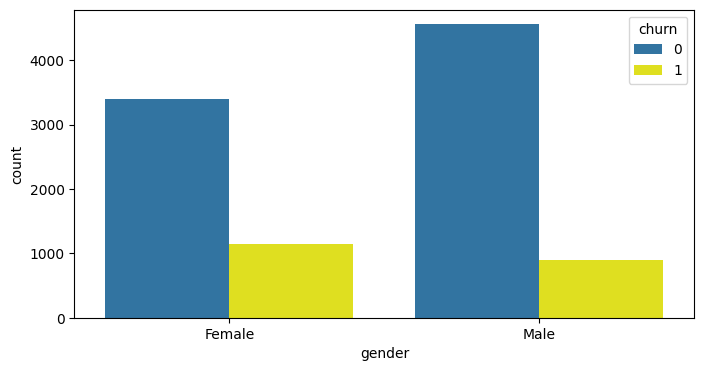

25.07% of customers who are Female has churned. 
16.46% of customers who are Male has churned. 


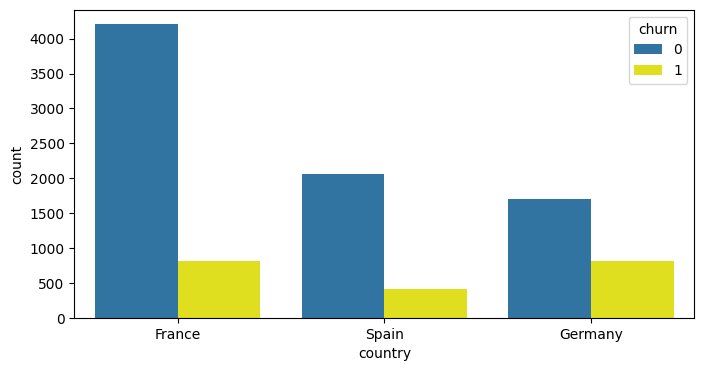

16.15% of customers from France has churned. 
16.67% of customers from Spain has churned. 
32.44% of customers from Germany has churned. 


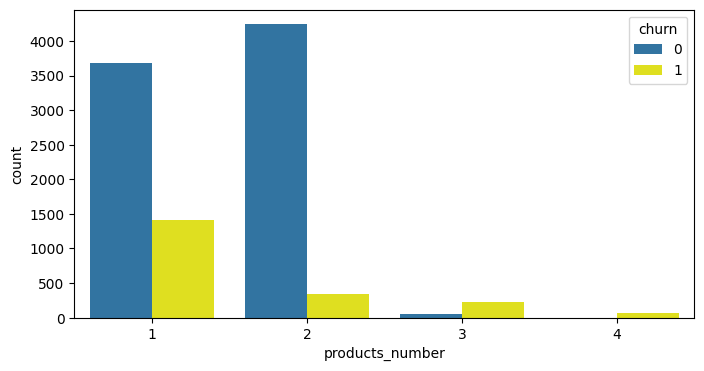

27.71% of customers who use 1 products_number has churned. 
82.71% of customers who use 3 products_number has churned. 
7.58% of customers who use 2 products_number has churned. 
100.0% of customers who use 4 products_number has churned. 


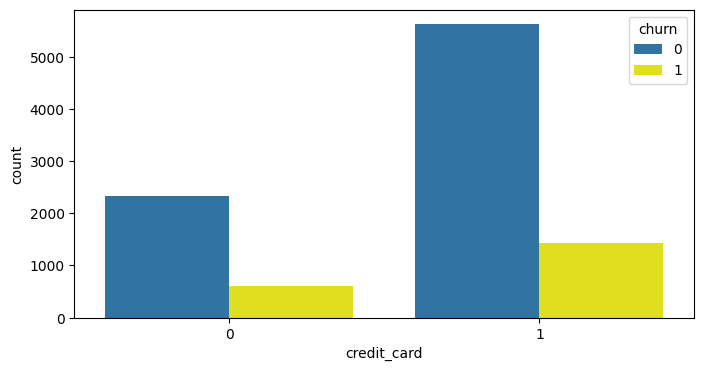

20.18% of customers who use 1 credit_card has churned. 
20.81% of customers who use 0 credit_card has churned. 


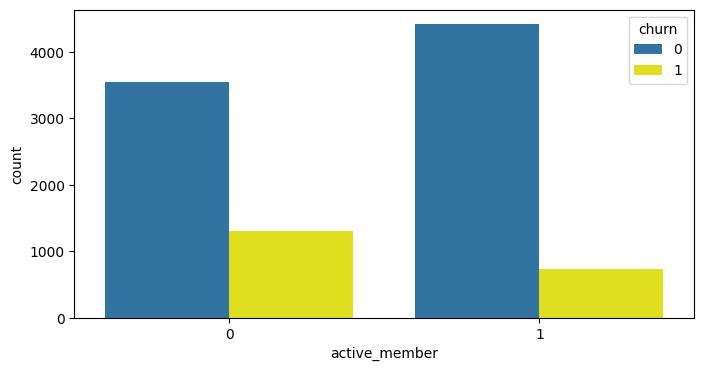

14.27% of customers who are 1 has churned. 
26.85% of customers who are 0 has churned. 


In [ ]:
categorical_data = data[['gender', 'country', 'products_number', 'credit_card', 'active_member']]

custom_palette = sns.color_palette(["#1f77b4", "#ffff00"])

for i in categorical_data :
    plt.figure(figsize=(8,4))
    sns.countplot(data = data, x = i ,hue = "churn", palette=custom_palette)
    plt.show()
    for x in data[i].unique():
        churn_pcnt = len(data[(data[i] == x) & (data["churn"] == 1)]) / len(data[data[i]==x]) *100
        churn_pcnt = round(churn_pcnt,2)
        if i =="country":
            print(f"{churn_pcnt}% of customers from {x} has churned. ")
        elif i not in(["credit_card","products_number"]):
            print(f"{churn_pcnt}% of customers who are {x} has churned. ")
        else:
            print(f"{churn_pcnt}% of customers who use {x} {i} has churned. ")

#**Exploring Numerical Variables and Churn Patterns**

We are exploring the breakdown of the numerical variables based on whether churn is 1 or 0.

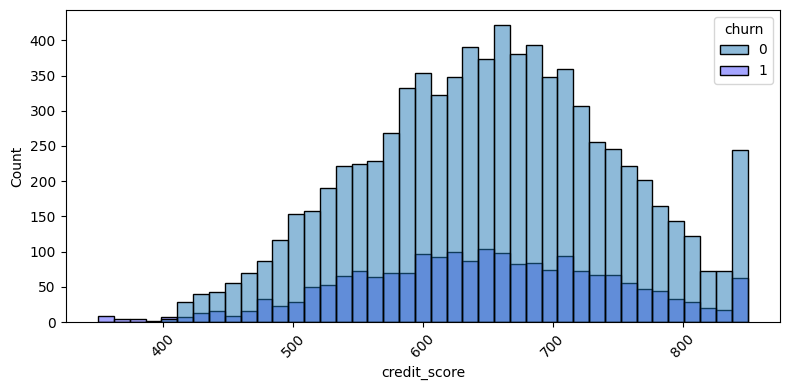

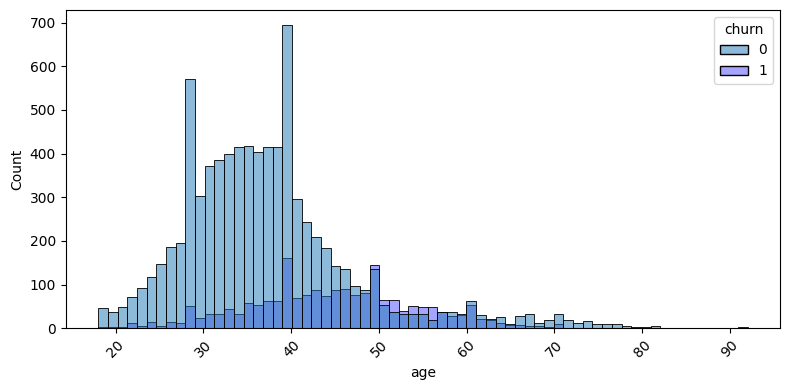

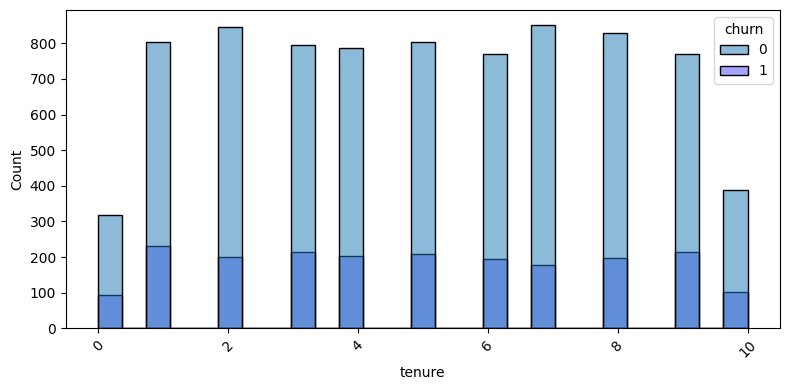

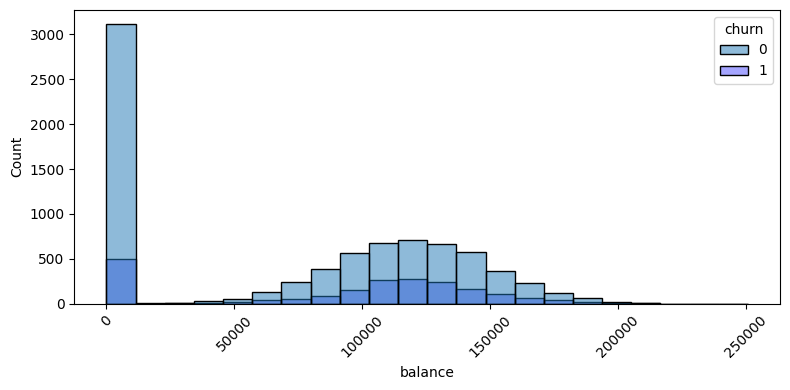

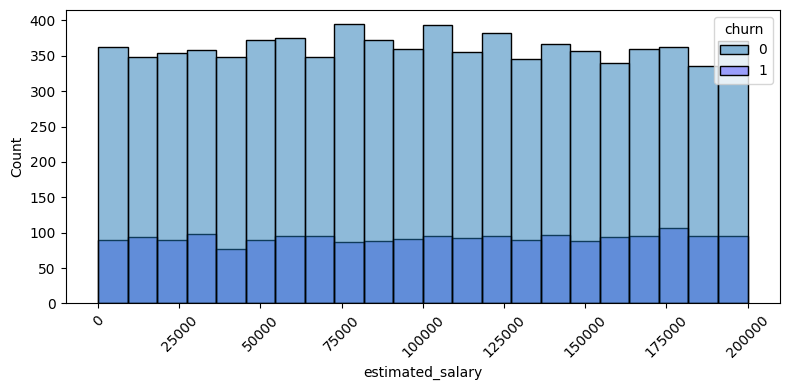

In [ ]:
numerical_variables = data[['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']]


num_rows = len(numerical_variables) // 2 + (len(numerical_variables) % 2 > 0)
num_cols = min(len(numerical_variables), 2)

custom_palette = sns.color_palette(["#1f77b4", "#4d4dff"])

for i, numerical in enumerate(numerical_variables):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=numerical, hue="churn", alpha=0.5, palette=custom_palette)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# **2.0 Data Preprocessing**


This step includes data cleaning (outlier removals), feature selection, feature rescalling, train/test data split and feature encoding.

# **Data Cleaning (Outlier Removal Not Needed)**

Note there are no missing data, only outliers need to be handled.

**Reason for not removing:**

Outliers in credit scores may reflect genuine variations in credit ratings among individuals. Removing these outliers could distort the representation of the true credit landscape and lead to inaccurate results and assessments.

Age outliers above 60 may represent a segment of the population that is genuinely older and still active in financial activities. Removing these outliers could lead to a biased representation of the customer base, neglecting the financial needs and behaviors of older individuals.

Outliers with 4 products may represent a segment of the customer base with diverse financial needs and preferences. Removing these outliers could overlook customers with a higher number of financial needs. These natural outliers could represent individuals or businesses with complex financial portfolios, diverse banking requirements, or substantial wealth management needs.

# **Initial Feature Selection**

In [ ]:
target_list = ['churn']
#ommiting customer_id as redundant, once data is split
features_initial = [col for col in data.columns if col not in ['customer_id','churn']]
print(features_initial)

['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']


Ommited customer_id as redundant and all independent variables are lowly correlated compared to our target value. However, after splitting the data, we will do further feature selection using variance threshold and select kbest strategy.

# **Train/Test Data Split**

In [ ]:
X = data[features_initial]
y = data[target_list]
# Split data into train and test sets with a 70-30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting arrays to confirm the split
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

display(X_train)

(7000, 10) (3000, 10) (7000, 1) (3000, 1)


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9069,619,Spain,Female,32,4,175406.13,2,1,1,172792.43
2603,643,Germany,Female,34,7,160426.07,1,0,1,188533.11
7738,561,France,Male,33,6,0.00,2,0,0,173680.39
1579,618,Germany,Male,41,8,37702.79,1,1,1,195775.48
5058,714,France,Male,37,9,148466.93,2,0,1,151280.96
...,...,...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,8,69712.74,1,1,1,69381.05
5191,682,France,Female,58,1,0.00,1,1,1,706.50
5390,735,France,Female,38,1,0.00,3,0,0,92220.12
860,667,France,Male,43,8,190227.46,1,1,0,97508.04


# **Dropping Features based off EDA**

Based off our chi squared score, we drop credit card.

In [ ]:
X_train.drop(columns = ["credit_card"],inplace = True)
X_test.drop(columns = ["credit_card"],inplace = True)



# **Data Preprocessing**

#**Binary Indicator Column**

**We** noted that customers who have credit scores anything lower than 400  will churn, hence a new column (lowCredit) was created, where 400 is the baseline.

In [ ]:
X_train["lowCredit"] = X_train.credit_score.apply(lambda x : 1 if x < 400 else 0)
X_test["lowCredit"] = X_test.credit_score.apply(lambda x : 1 if x < 400 else 0)
display(X_train)

#drop credit_score as well since we have a new binarycolumn
X_train.drop(columns = ["credit_score"],inplace = True)
X_test.drop(columns = ["credit_score"],inplace = True)

,credit_score,country,gender,age,tenure,balance,products_number,active_member,estimated_salary,lowCredit
9069,619,Spain,Female,32,4,175406.13,2,1,172792.43,0
2603,643,Germany,Female,34,7,160426.07,1,1,188533.11,0
7738,561,France,Male,33,6,0.00,2,0,173680.39,0
1579,618,Germany,Male,41,8,37702.79,1,1,195775.48,0
5058,714,France,Male,37,9,148466.93,2,1,151280.96,0
...,...,...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,8,69712.74,1,1,69381.05,0
5191,682,France,Female,58,1,0.00,1,1,706.50,0
5390,735,France,Female,38,1,0.00,3,0,92220.12,0
860,667,France,Male,43,8,190227.46,1,0,97508.04,0


# **Feature** **Rescaling**



In [ ]:
#product_numbers, low credit, credit_card and active member are cat and already put as 0 and 1 so not included for feature rescaling
numericalFeatures = ["balance", "estimated_salary", "age", "tenure", "products_number"]
categoricalFeatures = ["gender", "country"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[numericalFeatures] = scaler.fit_transform(X_train[numericalFeatures])
X_test[numericalFeatures] = scaler.transform(X_test[numericalFeatures])
display(X_train)
display(X_test)

,country,gender,age,tenure,balance,products_number,active_member,estimated_salary,lowCredit
9069,Spain,Female,0.189189,0.4,0.699113,0.333333,1,0.864027,0
2603,Germany,Female,0.216216,0.7,0.639407,0.000000,1,0.942778,0
7738,France,Male,0.202703,0.6,0.000000,0.333333,0,0.868470,0
1579,Germany,Male,0.310811,0.8,0.150271,0.000000,1,0.979011,0
5058,France,Male,0.256757,0.9,0.591742,0.333333,1,0.756406,0
...,...,...,...,...,...,...,...,...,...
5734,France,Male,0.486486,0.8,0.277853,0.000000,1,0.346662,0
5191,France,Female,0.540541,0.1,0.000000,0.000000,1,0.003084,0
5390,France,Female,0.270270,0.1,0.000000,0.666667,0,0.460925,0
860,France,Male,0.337838,0.8,0.758186,0.000000,0,0.487381,0


,country,gender,age,tenure,balance,products_number,active_member,estimated_salary,lowCredit
6252,Germany,Male,0.189189,0.3,0.385452,0.333333,0,0.208616,0
4684,France,Male,0.337838,0.1,0.000000,0.333333,1,0.731883,0
1731,Spain,Female,0.351351,0.4,0.000000,0.333333,0,0.292531,0
4742,Germany,Male,0.554054,0.8,0.474902,0.333333,1,0.853458,0
4521,Spain,Female,0.121622,0.7,0.498194,0.000000,1,0.573241,0
...,...,...,...,...,...,...,...,...,...
8014,Spain,Female,0.283784,0.2,0.505449,0.000000,1,0.374027,0
1074,France,Female,0.175676,0.7,0.445819,0.333333,1,0.181052,0
3063,France,Male,0.189189,0.7,0.286460,0.000000,1,0.759627,0
6487,France,Male,0.175676,0.2,0.000000,0.333333,1,0.319812,0


# **One-Hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Fit and transform the training set
X_train_onehot = ohe.fit_transform(X_train[["country"]])

# Transform the test set using the same encoder fitted on the training set
X_test_onehot = ohe.transform(X_test[["country"]])

# Convert the one-hot encoded arrays into DataFrames with appropriate column names
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=ohe.get_feature_names_out(["country"]))
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=ohe.get_feature_names_out(["country"]))

# Concatenate one-hot encoded columns to the original DataFrames, reset index to resolve issue of alignment
X_train = pd.concat([X_train.reset_index(drop=True), X_train_onehot_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_onehot_df.reset_index(drop=True)], axis=1)


In [ ]:
# Define a mapping dictionary
# do this to avoid unecessary one-hot to reduce dimensionality
gender_mapping = {"Female": 0, "Male": 1}
# Map the values in the 'gender' column using the mapping dictionary
X_train['gender'] = X_train['gender'].map(gender_mapping)
X_test['gender'] = X_test['gender'].map(gender_mapping)

In [ ]:
#drop categorical features since they have been one hot-encoded and binary convered
X_train.drop("country", axis=1, inplace=True)
X_test.drop("country", axis=1, inplace=True)


In [ ]:
display(X_train)
display(X_test)

,gender,age,tenure,balance,products_number,active_member,estimated_salary,lowCredit,country_France,country_Germany,country_Spain
0,0,0.189189,0.4,0.699113,0.333333,1,0.864027,0,0.0,0.0,1.0
1,0,0.216216,0.7,0.639407,0.000000,1,0.942778,0,0.0,1.0,0.0
2,1,0.202703,0.6,0.000000,0.333333,0,0.868470,0,1.0,0.0,0.0
3,1,0.310811,0.8,0.150271,0.000000,1,0.979011,0,0.0,1.0,0.0
4,1,0.256757,0.9,0.591742,0.333333,1,0.756406,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6995,1,0.486486,0.8,0.277853,0.000000,1,0.346662,0,1.0,0.0,0.0
6996,0,0.540541,0.1,0.000000,0.000000,1,0.003084,0,1.0,0.0,0.0
6997,0,0.270270,0.1,0.000000,0.666667,0,0.460925,0,1.0,0.0,0.0
6998,1,0.337838,0.8,0.758186,0.000000,0,0.487381,0,1.0,0.0,0.0


,gender,age,tenure,balance,products_number,active_member,estimated_salary,lowCredit,country_France,country_Germany,country_Spain
0,1,0.189189,0.3,0.385452,0.333333,0,0.208616,0,0.0,1.0,0.0
1,1,0.337838,0.1,0.000000,0.333333,1,0.731883,0,1.0,0.0,0.0
2,0,0.351351,0.4,0.000000,0.333333,0,0.292531,0,0.0,0.0,1.0
3,1,0.554054,0.8,0.474902,0.333333,1,0.853458,0,0.0,1.0,0.0
4,0,0.121622,0.7,0.498194,0.000000,1,0.573241,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0.283784,0.2,0.505449,0.000000,1,0.374027,0,0.0,0.0,1.0
2996,0,0.175676,0.7,0.445819,0.333333,1,0.181052,0,1.0,0.0,0.0
2997,1,0.189189,0.7,0.286460,0.000000,1,0.759627,0,1.0,0.0,0.0
2998,1,0.175676,0.2,0.000000,0.333333,1,0.319812,0,1.0,0.0,0.0


# **3.0 Machine Learning Model**

The problem statement we have is to predict whether a customer will eventually churn, making it a binary classification study.

This step will then feature us using 3 models, one decision tree (baseline with some tuning) , two advanced models (XG Boost and Random Forest).

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV


# **Baseline Model : Decison Tree Model**

In [ ]:
#fit to training data
decisionTreeBaseline = DecisionTreeClassifier(random_state=0).fit(X_train, Y_train)

# Make predictions on the test data
Y_predTest = decisionTreeBaseline.predict(X_test)
# Get predicted probabilities for target value of 1
Y_predTest_prob = decisionTreeBaseline.predict_proba(X_test)[:, 1]


# Get feature importances
feature_importances = decisionTreeBaseline.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
N = 20  # Choose the number of top features to display
top_features = importance_df.head(N)
# print(top_features)


In [ ]:
#changing to numpy array to suit y_predTest
Y_train_array = Y_train.values.ravel()
Y_test_array = Y_test.values.ravel()

# **Double checking that ground truth and predicted output aligns with scikit version**

In [ ]:
# YOUR CODES HERE
#y_test_array refers to ground truth while y_predTest refers to predicted output

#true positive: both ground truth and predicted output is true
tp = sum( (Y_test_array == 1) & (Y_predTest == 1))

# false positive: check when ground truth is false but  predicted output of model is positive
fp = sum( (Y_test_array == 0) & (Y_predTest == 1) )

# false negative: ground truth is true but predicted is false
fn = sum((Y_test_array == 1) & (Y_predTest == 0))

# true negatives: when both ground truth and predicted output of model are negative
tn = sum( (Y_test_array == 0) & (Y_predTest == 0))

# Print the counts of TP, FP, FN, and TN
print("True Positives:", tp)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Negatives:", tn)


True Positives: 293
False Positives: 306
False Negatives: 291
True Negatives: 2110


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_predTest))

[[2110  306]
 [ 291  293]]


In [ ]:
# Run this cell

def evaluation(y_test, y_pred, y_pred_prob):
    # Input:
    # y_test: Ground Truth labels
    # y_pred: Predicted labels
    # y_pred_prob: Predicted probability
    print('==========')
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_prob)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    display.plot()
    plt.show()
    print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t{}\nF1:\t{}\nAUC:\t{}".format(accuracy_score(y_test, y_pred),
                                                                                 precision_score(y_test, y_pred),
                                                                                 recall_score(y_test, y_pred),
                                                                                 f1_score(y_test, y_pred),
                                                                                 auc(fpr, tpr)))

# **Evaluation Of Baseline Model**

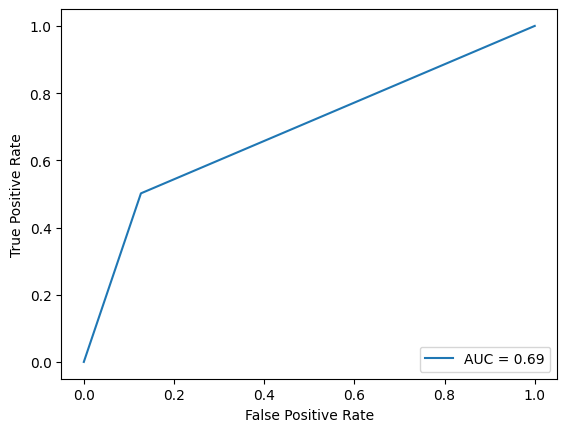

Accuracy:	0.801
Precision:	0.48914858096828046
Recall:	0.5017123287671232
F1:	0.4953508030431107
AUC:	0.6875283498140252


In [ ]:
evaluation(Y_test_array, Y_predTest, Y_predTest_prob)

# **Tuning our Baseline Model (Hyperparameter Tuning Using Grid Search)**

We will be doing hyper-paremeter tuning to improve performance of our baseline model. Firstly is to utilise grid search to find the most appropriate value for max_depth and min_samples_split.

In [ ]:
#initialising parameters
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]  # chose this range as i want to mitigate overfitting hence max_depth range is lower then min_samples split.
}
# Initialize Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc', #chose auc
                           n_jobs=-1)

# Perform Grid Search Cross-Validation
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 7, 'min_samples_split': 10}


Based off the grid search, max depth should be 7 and min_samples_split should be 10.

In [ ]:
# Initialize Decision Tree Classifier with best hyperparameters
tuned_decisionTree = DecisionTreeClassifier(random_state=0, **best_params)
tuned_decisionTree.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=0)

# **Tuned Baseline Decision Tree Model Evaluation (Grid Search)**

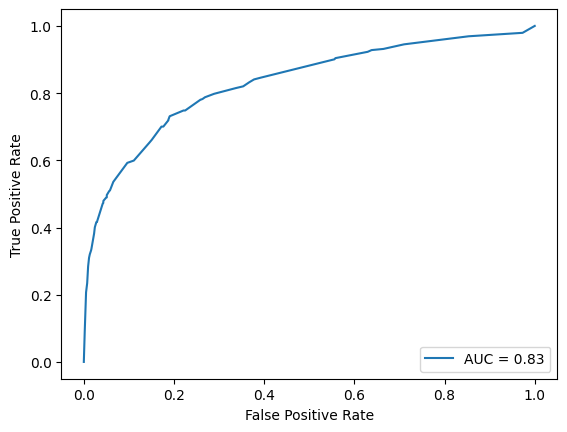

Accuracy:	0.8626666666666667
Precision:	0.7263157894736842
Recall:	0.4726027397260274
F1:	0.5726141078838175
AUC:	0.8306162399074662


In [ ]:
# Generate predictions and predicted probabilities for best model
Y_pred_tunedModel = tuned_decisionTree.predict(X_test)
Y_pred_prob_tunedModel = tuned_decisionTree.predict_proba(X_test)[:, 1]
# Evaluation of tuned Model
evaluation(Y_test_array, Y_pred_tunedModel, Y_pred_prob_tunedModel)

# **Tuning our Baseline Model (Hyperparameter Tuning Using Bayesian Optimization)**

In [ ]:
# Define the parameter search space
param_space = {
    'max_depth': (1, 10),              # Depth of the tree
    'min_samples_split': (2, 20),       # Minimum number of samples required to split an internal node
    'min_samples_leaf': (1, 20),        # Minimum number of samples required to be at a leaf node
    'max_features': (0.1, 1.0),         # Number of features to consider when looking for the best split
}

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Initialize the Bayesian optimization search
opt = BayesSearchCV(
    clf,
    search_spaces=param_space,
    n_iter=50,                          # Number of parameter settings that are sampled
    cv=5,                               # Number of cross-validation folds
    random_state=0,
    n_jobs=-1                           # Number of CPU cores to use (-1 means all available cores)
)

# Perform the Bayesian optimization search
opt.fit(X_train, Y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", opt.best_params_)

Best hyperparameters: OrderedDict([('max_depth', 8), ('max_features', 1.0), ('min_samples_leaf', 20), ('min_samples_split', 2)])


# **Tuned Baseline Decision Tree Model Evaluation (Bayesian Optimization)**

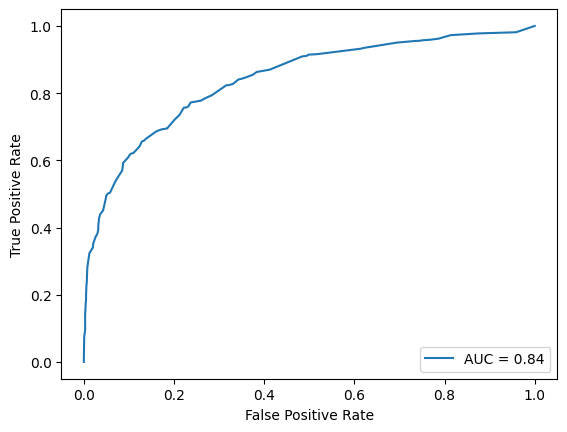

Accuracy:	0.8616666666666667
Precision:	0.744927536231884
Recall:	0.4400684931506849
F1:	0.5532831001076426
AUC:	0.8403721196588952


In [ ]:
# Get the best estimator from Bayesian optimization
best_clf = opt.best_estimator_

# Make predictions on the test set
y_pred_bayesianDecisionTree = best_clf.predict(X_test)
y_pred_prob_bayesianDecisionTree  = best_clf.predict_proba(X_test)[:, 1]
evaluation(Y_test_array, y_pred_bayesianDecisionTree, y_pred_prob_bayesianDecisionTree )

# **Comparison Of Baseline Models With Respective Tuning Strategies**

In [ ]:
from IPython.display import display, HTML
# Define a list to store evaluation results
evaluation_df = []

# Function to summarize evaluation metrics
def evaluationSummary(y_test, y_pred, y_pred_prob):
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_test, y_pred)
    metrics['Precision'] = precision_score(y_test, y_pred)
    metrics['Recall'] = recall_score(y_test, y_pred)
    metrics['F1'] = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    metrics['AUC'] = auc(fpr, tpr)
    return metrics

# Evaluate each model and store the results
evaluation_df.append(('Baseline Decision Tree', evaluationSummary(Y_test_array, Y_predTest, Y_predTest_prob)))
evaluation_df.append(('Tuned Decision Tree (GridSearch)', evaluationSummary(Y_test_array, Y_pred_tunedModel, Y_pred_prob_tunedModel)))
evaluation_df.append(('Tuned Decision Tree (Bayesian)', evaluationSummary(Y_test_array, y_pred_bayesianDecisionTree, y_pred_prob_bayesianDecisionTree)))

# Create a DataFrame from the evaluation results
evaluation_df = pd.DataFrame(evaluation_df, columns=['Model', 'Metrics'])

# Expand the 'Metrics' column into separate columns
evaluation_df  = pd.concat([evaluation_df['Model'], evaluation_df['Metrics'].apply(pd.Series)], axis=1)

# Display the DataFrame
display(HTML("<h2 style='font-weight: bold;'>Evaluation Results Between Decision Tree Models</h2>"))
display(evaluation_df)



,Model,Accuracy,Precision,Recall,F1,AUC
0,Baseline Decision Tree,0.801000,0.489149,0.501712,0.495351,0.687528
1,Tuned Decision Tree (GridSearch),0.862667,0.726316,0.472603,0.572614,0.830616
2,Tuned Decision Tree (Bayesian),0.861667,0.744928,0.440068,0.553283,0.840372


The decision tree model tuned using bayesian optimization provided the best results, significantly outperforming the grid search model and the baseline tree model.

# **Advanced Models**

This will be us testing the XG Boost and Random Forest in hopes of better accuracy and overall performance.

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model_50 = RandomForestClassifier(n_estimators=50, random_state=0)
rf_model_50.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=50, random_state=0)

**We utilised 50 estimators as this would give us the best results based on our observations from homework 2 as well.**

In [ ]:
y_pred_rf_50 = rf_model_50.predict(X_test)
y_pred_prob_rf_50 = rf_model_50.predict_proba(X_test)[:, 1]
print("Predicted labels for Random Forest Model with 50 estimators:", y_pred_rf_50)
print("Predicted probabilities for Random Forest Model with 50 estimators:", y_pred_prob_rf_50)

Predicted labels for Random Forest Model with 50 estimators: [0 0 0 ... 0 0 0]
Predicted probabilities for Random Forest Model with 50 estimators: [0.   0.   0.24 ... 0.02 0.02 0.44]


# **Random Forest Evaluation**

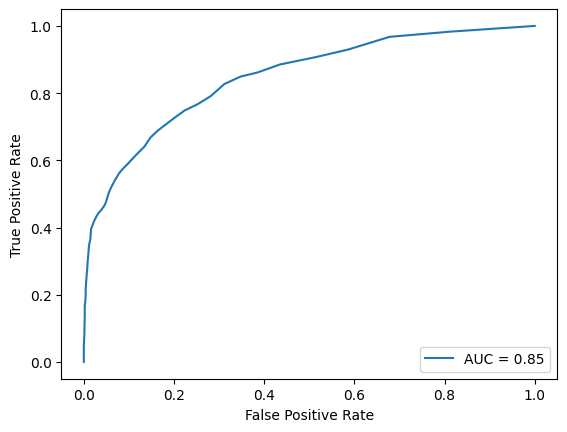

Accuracy:	0.8583333333333333
Precision:	0.7012658227848101
Recall:	0.4743150684931507
F1:	0.5658835546475995
AUC:	0.8464453585684478


In [ ]:
evaluation(Y_test_array, y_pred_rf_50, y_pred_prob_rf_50)

# **XG Boost**

In [ ]:
xgb_model = XGBClassifier(random_state=0)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("Predicted labels for XGBoost Classifier:", y_pred_xgb)
print("Predicted probabilities for XGBoost Classifier:", y_pred_prob_xgb)

Predicted labels for XGBoost Classifier: [0 0 0 ... 0 0 0]
Predicted probabilities for XGBoost Classifier: [0.01213761 0.01524231 0.08321775 ... 0.02418806 0.01003627 0.31415522]


# **XG Boost Evaluation**

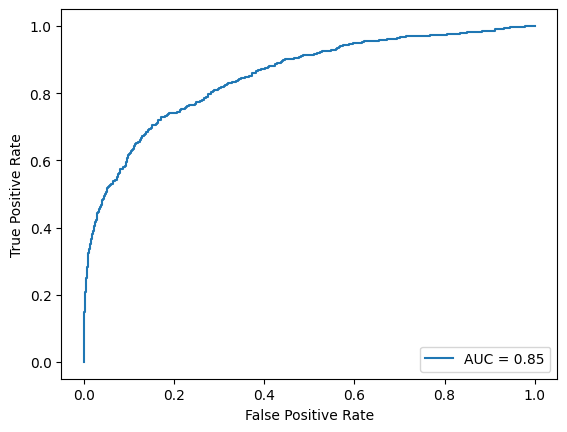

Accuracy:	0.864
Precision:	0.7065727699530516
Recall:	0.5154109589041096
F1:	0.5960396039603961
AUC:	0.8510061348997551


In [ ]:
# Run this cell
evaluation(Y_test_array, y_pred_xgb, y_pred_prob_xgb)

# **Comparison Of All Models**

In [ ]:
from IPython.display import display, HTML
# Define a list to store evaluation results
evaluation_df = []

# Function to summarize evaluation metrics
def evaluationSummary(y_test, y_pred, y_pred_prob):
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_test, y_pred)
    metrics['Precision'] = precision_score(y_test, y_pred)
    metrics['Recall'] = recall_score(y_test, y_pred)
    metrics['F1'] = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    metrics['AUC'] = auc(fpr, tpr)
    return metrics

# Evaluate each model and store the results
evaluation_df.append(('Baseline Decision Tree', evaluationSummary(Y_test_array, Y_predTest, Y_predTest_prob)))
evaluation_df.append(('Tuned Decision Tree (GridSearch)', evaluationSummary(Y_test_array, Y_pred_tunedModel, Y_pred_prob_tunedModel)))
evaluation_df.append(('Tuned Decision Tree (Bayesian)', evaluationSummary(Y_test_array, y_pred_bayesianDecisionTree, y_pred_prob_bayesianDecisionTree)))
evaluation_df.append(('Random Forest', evaluationSummary(Y_test_array, y_pred_rf_50,  y_pred_prob_rf_50)))
evaluation_df.append(('XGB Boost', evaluationSummary(Y_test_array, y_pred_xgb,  y_pred_prob_xgb)))

# Create a DataFrame from the evaluation results
evaluation_df = pd.DataFrame(evaluation_df, columns=['Model', 'Metrics'])

# Expand the 'Metrics' column into separate columns
evaluation_df  = pd.concat([evaluation_df['Model'], evaluation_df['Metrics'].apply(pd.Series)], axis=1)

# Display the DataFrame
display(HTML("<h2 style='font-weight: bold;'>Evaluation Results Between All Models</h2>"))
display(evaluation_df)

,Model,Accuracy,Precision,Recall,F1,AUC
0,Baseline Decision Tree,0.801000,0.489149,0.501712,0.495351,0.687528
1,Tuned Decision Tree (GridSearch),0.862667,0.726316,0.472603,0.572614,0.830616
2,Tuned Decision Tree (Bayesian),0.861667,0.744928,0.440068,0.553283,0.840372
3,Random Forest,0.858333,0.701266,0.474315,0.565884,0.846445
4,XGB Boost,0.864000,0.706573,0.515411,0.596040,0.851006


Hypertuning was successful as they performed better than the baseline model. Advanced models also performed alot better, justifying our choice of models.

XGB Boost performed the best relatively from an overall perspective (more details in report)


# **4.0 Intepretation**

Recommendations based off results (XG Boost)

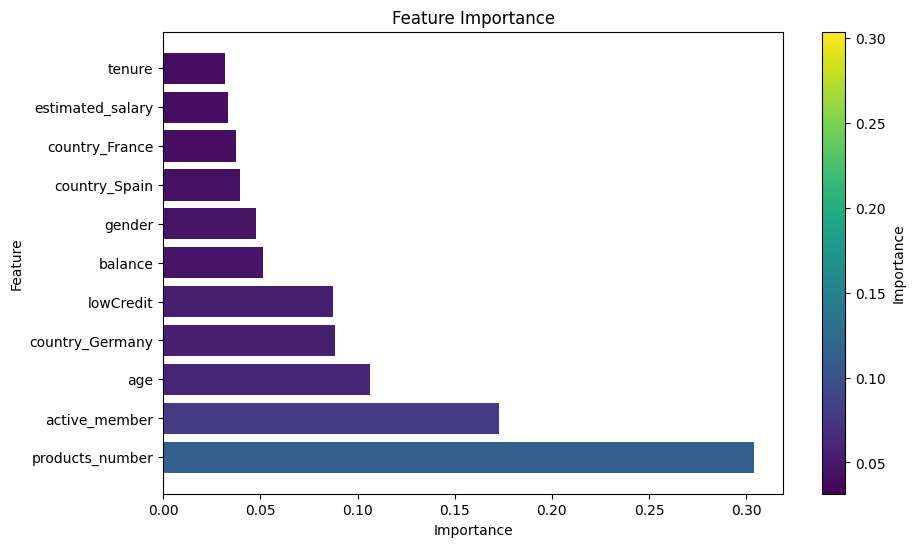

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# Get feature importance
importance_values = xgb_model.feature_importances_

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_values})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=plt.cm.viridis(feature_importance_df['Importance']))

# Create a ScalarMappable object using the 'viridis' colormap and normalize the importance values
norm = Normalize(vmin=feature_importance_df['Importance'].min(), vmax=feature_importance_df['Importance'].max())
sm = cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])

# Add color bar
plt.colorbar(sm, orientation='vertical', label='Importance')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


Products_Numbers is noted to be the most important factor in deciding whether a customer would churn.

# **Converting to HTML**

In [ ]:
#converting to html
!pip install nbconvert

In [ ]:
%cd "/content/drive/My Drive/IS4303/Codes"
!ls

/content/drive/My Drive/IS4303/Codes
GroupProject.ipynb		      kaggle.ipynb	   T06.ipynb
IS4303_Supplementary_Materials.ipynb  SyafiqVersion.ipynb


In [64]:
!jupyter nbconvert T06.ipynb --to html


[NbConvertApp] Converting notebook T06.ipynb to html
[NbConvertApp] Writing 1583993 bytes to T06.html
